In [5]:
import scqubits
import numpy as np
from scipy.optimize import minimize
from CoupledQuantumSystems.systems import *


In [6]:
EJ = 4
EC = EJ/2.0
EL = EJ/30

qubit_level = 30


def get_shift_accurate(ele,omega_i, omega_j, omega_r):
    return abs(ele)**2 / (omega_j-omega_i-omega_r) - abs(ele)**2 / (omega_i-omega_j-omega_r)


qbt = scqubits.Fluxonium(EJ=EJ,EC=EC,EL=EL,flux=0,cutoff=110,truncated_dim=qubit_level)
evals = qbt.eigenvals(qubit_level)
elements = qbt.matrixelement_table('n_operator',evals_count = qubit_level)

def shift_diff(x):
    Er = x[0]
    shifts_from_zero = [get_shift_accurate(elements[0,ql2],evals[ql2],evals[0],Er) for ql2 in range(qubit_level)] 
    shift_from_zero = sum(shifts_from_zero)
    # shifts_from_one = [get_shift_accurate(elements[1,ql2],evals[ql2],evals[1],Er) for ql2 in range(qubit_level)] 
    # shift_from_one = sum(shifts_from_one)
    shifts_from_two = [get_shift_accurate(elements[2,ql2],evals[ql2],evals[2],Er) for ql2 in range(qubit_level)] 
    shift_from_two = sum(shifts_from_two)
    return abs(shift_from_zero-shift_from_two)

initial_guess = [13.7]

# Call the optimizer
result = minimize(shift_diff, initial_guess, method='Nelder-Mead')

print("Result:", result)
print("Optimal solution:", result.x)
print("Objective value:", result.fun)


Result:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.2547669126991567e-07
             x: [ 1.363e+01]
           nit: 14
          nfev: 28
 final_simplex: (array([[ 1.363e+01],
                       [ 1.363e+01]]), array([ 1.255e-07,  4.364e-07]))
Optimal solution: [13.63285461]
Objective value: 1.2547669126991567e-07


In [9]:
evals = qbt.eigenvals(20)
evals[1]-evals[0],evals[2]-evals[1]

(2.416990781353939, 0.1345398992941591)

In [11]:
13.63285461 - (evals[10]-evals[1])

0.1157919969911756

In [13]:
Er = result.x[0]

g = 0.3

max_ol = 80
max_ql = 30
system = FluxoniumOscillatorSystem(
    EJ = EJ,
    EC = EC,
    EL = EL,
    Er = Er,
    g_strength = g,
    qubit_level = max_ql,
    osc_level = max_ol,
    # kappa = 0.004,
    products_to_keep=[[ql, ol] for ql in range(max_ql) for ol in range(max_ol) ],
    computaional_states = '1,2'
    )


energies=  system.hilbertspace.eigenvals(max_ql * max_ol)
def dressed_ener(ql,ol):
    return energies[system.product_to_dressed[(ql,ol)]]
def print_stats():
    print(f"\nqubit 12 transition and differential stark at different oscillator level")
    print(f"qbt freq at osc {0}:\t{(dressed_ener(2,0)-dressed_ener(1,0))}")
    ground_freq = dressed_ener(2,0)-dressed_ener(1,0)
    for i in range(1,max_ol-1):
        freq = dressed_ener(2,i)-dressed_ener(1,i)
        print(f"qbt freq at osc {i}:\t{freq:.5f}, \tdiff to at osc ground {freq - ground_freq:.5f}, {abs(freq - ground_freq)/ground_freq*100:.4f}% diff")

    print(f"\noscillator freq at qubit level:\t0 \t 1 \t 2 \t 3:")
    print(f"oscillator transition 0-1: \t{dressed_ener(0,1)-dressed_ener(0,0):.5f}\t{dressed_ener(1,1)-dressed_ener(1,0):.5f}\t{dressed_ener(2,1)-dressed_ener(2,0):.5f}\t{dressed_ener(3,1)-dressed_ener(3,0):.5f}")
    for i in range(1,max_ol-1):
        print(f"oscillator transition {i}-{i+1}: \t{dressed_ener(0,i+1)-dressed_ener(0,i):.5f}\t{dressed_ener(1,i+1)-dressed_ener(1,i):.5f}\t{dressed_ener(2,i+1)-dressed_ener(2,i):.5f}\t{dressed_ener(3,i+1)-dressed_ener(3,i):.5f}  oscillator frequency coupled to qubit 0th state compared to 00-01 (non-linearity): {(dressed_ener(0,i+1)-dressed_ener(0,i))  -(dressed_ener(0,1)-dressed_ener(0,0))}")

    print(f"")
    print(f"10-11: {(dressed_ener(1,1)-dressed_ener(1,0)):.4f}, diff to 00-01: {abs((dressed_ener(0,1)-dressed_ener(0,0))    -(dressed_ener(1,1)-dressed_ener(1,0)))}")
    print(f"20-21: {(dressed_ener(2,1)-dressed_ener(2,0)):.4f}, diff to 00-01: {abs((dressed_ener(0,1)-dressed_ener(0,0))    -(dressed_ener(2,1)-dressed_ener(2,0)))}")
print_stats()
# plot_specturum(system.qbt, system.osc, system.hilbertspace,num_levels = 50)


qubit 12 transition and differential stark at different oscillator level
qbt freq at osc 0:	0.13442369159562495
qbt freq at osc 1:	0.13098, 	diff to at osc ground -0.00344, 2.5618% diff
qbt freq at osc 2:	0.12773, 	diff to at osc ground -0.00669, 4.9772% diff
qbt freq at osc 3:	0.12465, 	diff to at osc ground -0.00977, 7.2678% diff
qbt freq at osc 4:	0.12172, 	diff to at osc ground -0.01270, 9.4504% diff
qbt freq at osc 5:	0.11891, 	diff to at osc ground -0.01551, 11.5384% diff
qbt freq at osc 6:	0.11622, 	diff to at osc ground -0.01820, 13.5424% diff
qbt freq at osc 7:	0.11363, 	diff to at osc ground -0.02080, 15.4716% diff
qbt freq at osc 8:	0.11112, 	diff to at osc ground -0.02330, 17.3331% diff
qbt freq at osc 9:	0.10870, 	diff to at osc ground -0.02572, 19.1335% diff
qbt freq at osc 10:	0.10636, 	diff to at osc ground -0.02806, 20.8780% diff
qbt freq at osc 11:	0.10408, 	diff to at osc ground -0.03034, 22.5712% diff
qbt freq at osc 12:	0.10187, 	diff to at osc ground -0.03255, 24

In [14]:
dressed_ener(1,1)-dressed_ener(1,0), dressed_ener(0,1)-dressed_ener(0,0), dressed_ener(2,1)-dressed_ener(2,0)

(13.63667708352994, 13.633232580362803, 13.633233367457425)

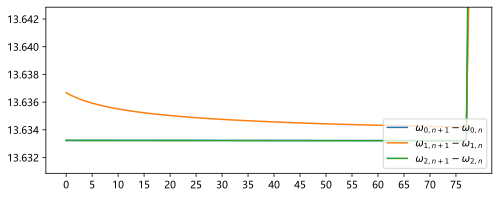

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,3))
n_osc_lvls = max_ol-1
dressed_osc_frequencies = [[] for _ in range(3)]
for j in [0,1,2]:
    for i in range(0,max_ol-1):
        dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))
        
for j in [0,1,2]:
    plt.plot(list(range(max_ol-1))[:n_osc_lvls], dressed_osc_frequencies[j][:n_osc_lvls],label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$')

plt.xticks(list(range(n_osc_lvls))[::5])
plt.ylim(Er-0.002, Er+0.01)
# plt.ylim(7.9,7.92)

# plt.xticklabels([str(i) for i in range(n_osc_lvls)])
plt.legend(loc='lower right')

In [12]:
13.63667708352994 - 13.63285461,  13.633232580362803 - 13.63285461

(0.003822473529938364, 0.0003779703628019604)